<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building the network</a></span></li></ul></div>

# Data
We will be using the famous Titanic dataset. Here are some functions to help you clean it and start training your models

In [2]:
# import libraries
import pandas as pd

# import the two datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# show what the data looks like
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
!pip install keras

In [3]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl


In [4]:
# define cleaning functions and import libraries
from sklearn.preprocessing import StandardScaler

def prep_data(df):
    """
    This function takes in a dataframe of the titanic 
    dataset and returns a cleaned version.
    """
    
    # first delete irrelevant columns
    df = df.drop(['Name', 'Ticket','PassengerId'], axis=1)
    
    # Fill missing numerical data
    df['Age'] = df['Age'].fillna(value=df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(value=df['Fare'].mean())
   
    #Cabin arrangement
    cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
    for dataset in train_test_data:
        dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    
    # fill missing Fare with median fare for each Pclass
    train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
    test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

    # fill missing categorical variable
    df['Embarked'] = df['Embarked'].fillna(value=df['Embarked'].value_counts().idxmax())
    
    # turn the relevant categorical variables into dummies
    df = pd.get_dummies(df)
    
    # split the data into dependent and independent variables
    X = df.drop(['Survived'], axis=1).values.astype(float)
    Y = df['Survived'].values
    
    return X, Y

# prep data
X_train, Y_train = prep_data(train)
#X_test, Y_test = prep_data(test)

# finally scale the X values
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
# X_test = scale.transform(X_test)

# show what the data looks like
X_train

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.63878901,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.2846632 , -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.2846632 , -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254]])

# Building the network
Here you get to build your network, a skeleton has already been provided for you

In [6]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [10]:
# import libraries
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
# this is to keep saving and load the best model
from tensorflow.keras.callbacks import ModelCheckpoint
# import for live loss plot
from livelossplot.tf_keras import PlotLossesCallback

# define model function
def build_model(input_dim):
    """
    In this function you can specify the architecture of your model.
    It will be called when you actually want to train it.
    Your input dimensions are equal to "X.shape[1]" when dealing with tabular data
    """
    
    # initialise model
    model = Sequential()
    
    # hidden layer
    model.add(Dense(16, input_dim=10, activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(8, input_dim=10, activation='relu'))
    model.add(Dense(8, input_dim=10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


def train_model(model, X_train, Y_train, epochs):
    """
    Here you actually train the model. It requires the training data, training labels 
    and a compiled model. 
    You should also specify how long you with to train your model.
    Verbose specifies whether you want to be updated on what's happening
    """
    
    # specify checkpoint for callbacks
    checkpoint = ModelCheckpoint('model_dense.h5', verbose=1, monitor='val_acc',
                                 save_best_only=True, mode='auto')
    
    
    history = model.fit(X_train, Y_train, epochs=epochs,
                        validation_split=0.2, callbacks=[checkpoint, PlotLossesCallback()], 
                        verbose=1)


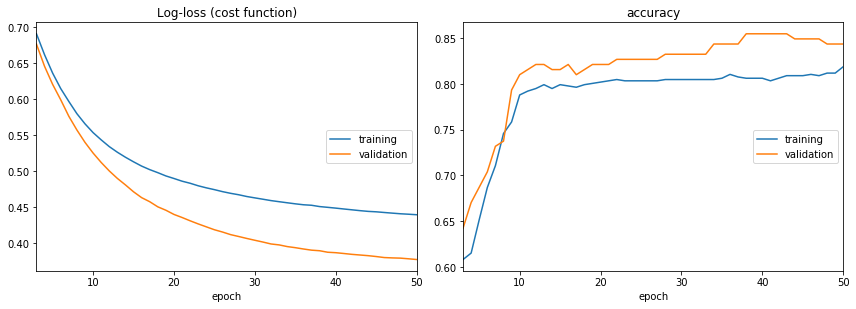

Log-loss (cost function):
training   (min:    0.440, max:    0.774, cur:    0.440)
validation (min:    0.377, max:    0.754, cur:    0.377)

accuracy:
training   (min:    0.608, max:    0.819, cur:    0.819)
validation (min:    0.642, max:    0.855, cur:    0.844)
712/712 [==============================] - 1s 842us/sample - loss: 0.4395 - accuracy: 0.8188 - val_loss: 0.3773 - val_accuracy: 0.8436


In [9]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 50)

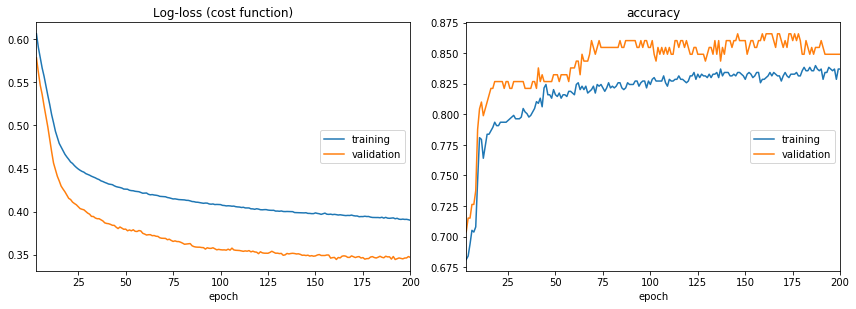

Log-loss (cost function):
training   (min:    0.390, max:    0.649, cur:    0.390)
validation (min:    0.344, max:    0.622, cur:    0.347)

accuracy:
training   (min:    0.642, max:    0.840, cur:    0.837)
validation (min:    0.654, max:    0.866, cur:    0.849)
712/712 [==============================] - 1s 944us/sample - loss: 0.3899 - accuracy: 0.8371 - val_loss: 0.3467 - val_accuracy: 0.8492


In [14]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 200)

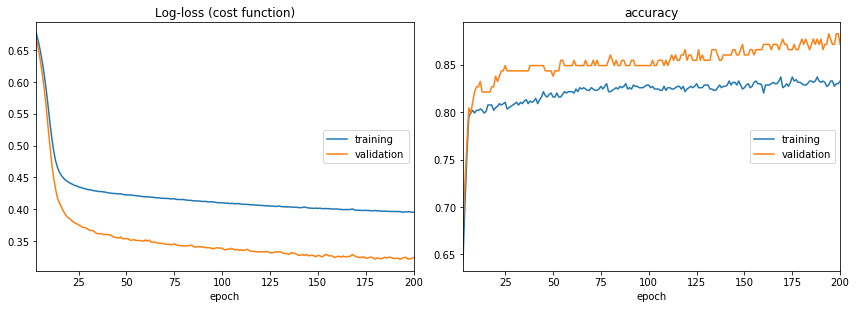

Log-loss (cost function):
training   (min:    0.395, max:    0.701, cur:    0.395)
validation (min:    0.321, max:    0.694, cur:    0.324)

accuracy:
training   (min:    0.552, max:    0.837, cur:    0.833)
validation (min:    0.609, max:    0.883, cur:    0.872)
712/712 [==============================] - 1s 944us/sample - loss: 0.3952 - accuracy: 0.8329 - val_loss: 0.3240 - val_accuracy: 0.8715


In [15]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 200)
#with 3 hidden layers

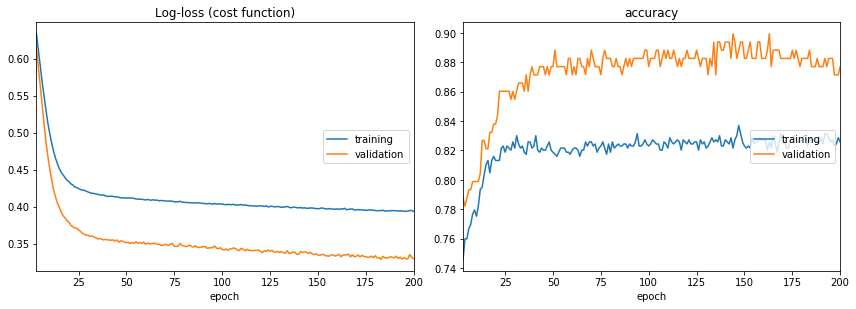

Log-loss (cost function):
training   (min:    0.394, max:    0.684, cur:    0.394)
validation (min:    0.329, max:    0.671, cur:    0.330)

accuracy:
training   (min:    0.548, max:    0.837, cur:    0.826)
validation (min:    0.704, max:    0.899, cur:    0.877)
712/712 [==============================] - 1s 1ms/sample - loss: 0.3938 - accuracy: 0.8258 - val_loss: 0.3296 - val_accuracy: 0.8771


In [16]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 200)
#with 3 hidden layers and dropout

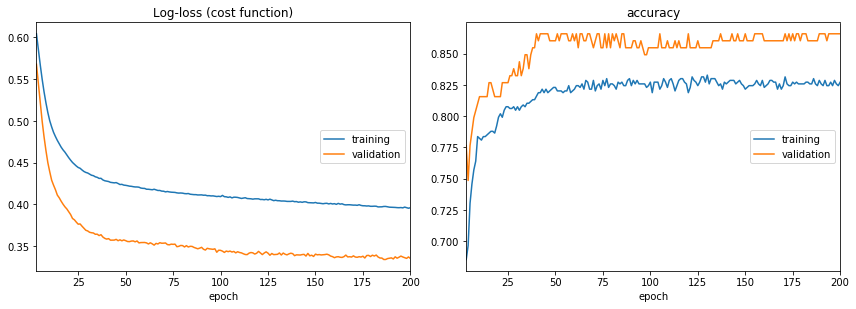

Log-loss (cost function):
training   (min:    0.395, max:    0.648, cur:    0.396)
validation (min:    0.334, max:    0.620, cur:    0.335)

accuracy:
training   (min:    0.636, max:    0.833, cur:    0.827)
validation (min:    0.704, max:    0.866, cur:    0.866)
712/712 [==============================] - 1s 1ms/sample - loss: 0.3959 - accuracy: 0.8272 - val_loss: 0.3352 - val_accuracy: 0.8659


In [17]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 200)
#with 2 hidden layers with dropout

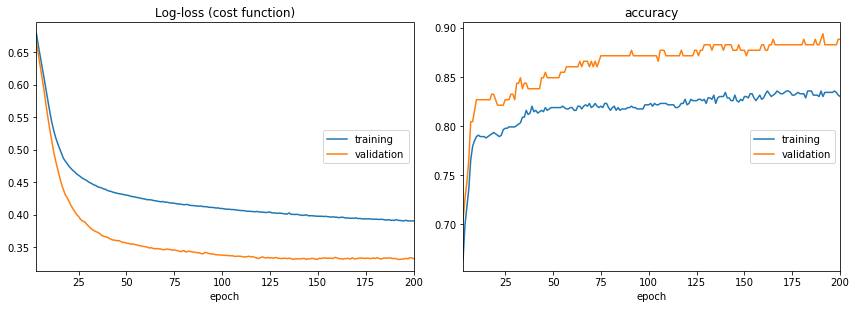

Log-loss (cost function):
training   (min:    0.390, max:    0.735, cur:    0.390)
validation (min:    0.331, max:    0.717, cur:    0.332)

accuracy:
training   (min:    0.487, max:    0.836, cur:    0.830)
validation (min:    0.570, max:    0.894, cur:    0.888)
712/712 [==============================] - 1s 820us/sample - loss: 0.3903 - accuracy: 0.8301 - val_loss: 0.3322 - val_accuracy: 0.8883


In [19]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 200)
#with 3 hidden layers with drop out with 10 nodes

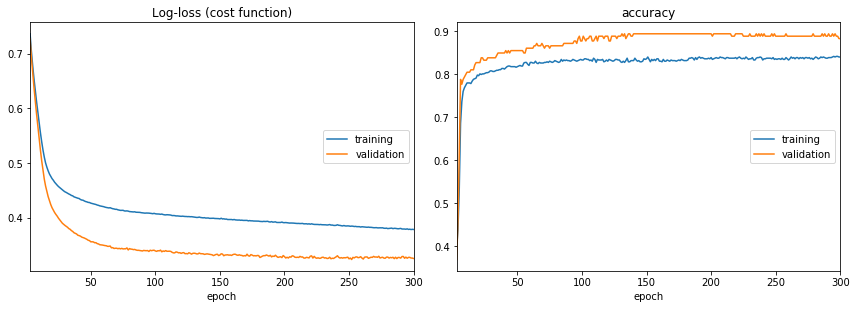

Log-loss (cost function):
training   (min:    0.378, max:    0.872, cur:    0.379)
validation (min:    0.324, max:    0.842, cur:    0.325)

accuracy:
training   (min:    0.390, max:    0.841, cur:    0.840)
validation (min:    0.358, max:    0.894, cur:    0.883)
712/712 [==============================] - 0s 696us/sample - loss: 0.3785 - accuracy: 0.8399 - val_loss: 0.3255 - val_accuracy: 0.8827


In [20]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 300)
#with 3 hidden layers with drop out with 10 nodes

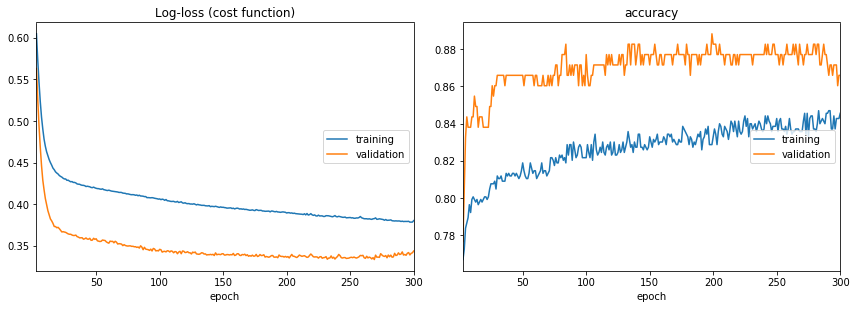

Log-loss (cost function):
training   (min:    0.378, max:    0.664, cur:    0.380)
validation (min:    0.334, max:    0.642, cur:    0.344)

accuracy:
training   (min:    0.664, max:    0.847, cur:    0.846)
validation (min:    0.721, max:    0.888, cur:    0.866)
712/712 [==============================] - 1s 899us/sample - loss: 0.3802 - accuracy: 0.8455 - val_loss: 0.3437 - val_accuracy: 0.8659


In [21]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 300)
#with 3 hidden layers with drop out with 10 nodes with 16

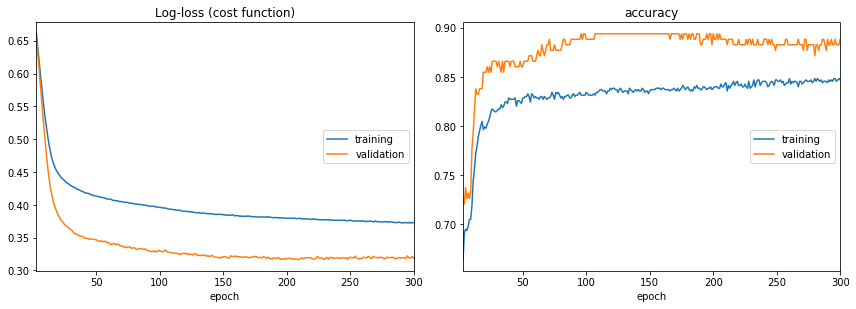

Log-loss (cost function):
training   (min:    0.372, max:    0.709, cur:    0.373)
validation (min:    0.317, max:    0.700, cur:    0.319)

accuracy:
training   (min:    0.489, max:    0.848, cur:    0.847)
validation (min:    0.598, max:    0.894, cur:    0.888)
712/712 [==============================] - 1s 741us/sample - loss: 0.3729 - accuracy: 0.8469 - val_loss: 0.3188 - val_accuracy: 0.8883


In [22]:
# build model
model = build_model(X_train.shape[1:])

# train model
train_model(model, X_train, Y_train, epochs = 300)
#with 2 hidden layers with drop out with 10 nodes